## Import libs

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import make_pipeline
import os

## Feature Transform (QuantileTransformer)

##### Load Data

In [15]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_data_path = f"{notebook_path}/data/data_pt.csv"

In [16]:
pt_data = pd.read_csv(csv_data_path)
pt_data.head()
x = pt_data['xdata']
x = x.values.reshape(-1, 1)
y = pt_data['ydata']

#### Plot Data

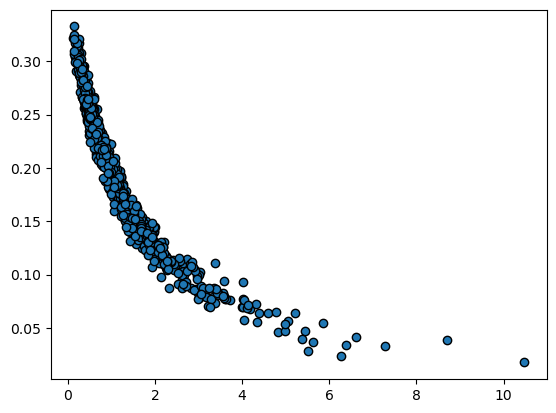

In [17]:
plt.scatter(x, y, ec='k')

#### QuantileTransformer

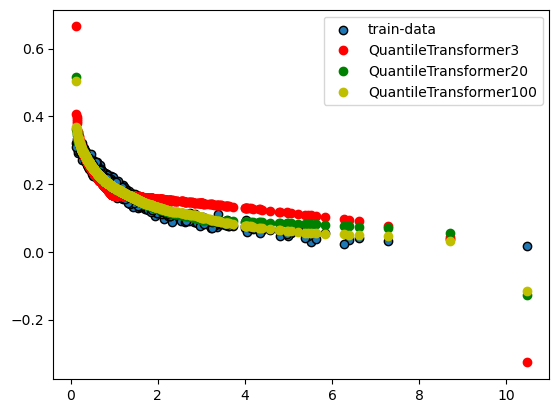

In [18]:
# QuantileTransformer with n_quantiles=3
Quantile_transform = QuantileTransformer(n_quantiles=3, output_distribution='normal')
x_Quantile_transform3 = Quantile_transform.fit_transform(x)

model = LinearRegression()
model.fit(x_Quantile_transform3, y)
y_hat_Quantile3 = model.predict(x_Quantile_transform3)

# QuantileTransformer with n_quantiles=20
Quantile_transform = QuantileTransformer(n_quantiles=20, output_distribution='normal')
x_Quantile_transform20 = Quantile_transform.fit_transform(x)

model = LinearRegression()
model.fit(x_Quantile_transform20, y)
y_hat_Quantile20 = model.predict(x_Quantile_transform20)

# QuantileTransformer with n_quantiles=100
Quantile_transform = QuantileTransformer(n_quantiles=100, output_distribution='normal')
x_Quantile_transform100 = Quantile_transform.fit_transform(x)

model = LinearRegression()
model.fit(x_Quantile_transform100, y)
y_hat_Quantile100 = model.predict(x_Quantile_transform100)


# plots
plt.scatter(x, y, ec='k', label='train-data')
plt.scatter(x, y_hat_Quantile3, color='r', label='QuantileTransformer3')
plt.scatter(x, y_hat_Quantile20, color='g', label='QuantileTransformer20')
plt.scatter(x, y_hat_Quantile100, color='y', label='QuantileTransformer100')
plt.legend();

#### Distribution

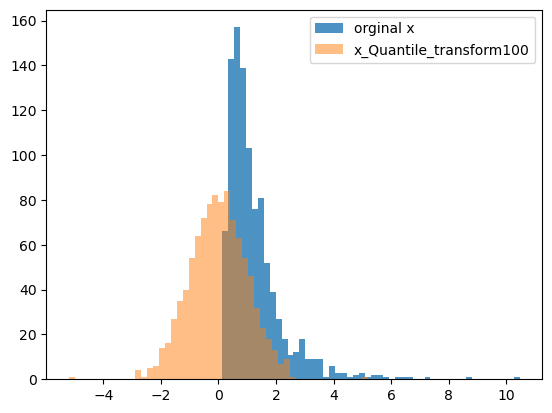

In [19]:
plt.hist(x, bins=50, alpha=0.8, label='orginal x')
plt.hist(x_Quantile_transform100, bins=50, alpha=0.5, label='x_Quantile_transform100')
plt.legend();